In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
#nice_cmap=sns.diverging_palette(245, 15, n=8,as_cmap=True)

In [3]:
months = [f"{x:02d}" for x in range(7,11)]
years = [f"{x:04d}" for x in range(141,181)]
i =0
result = np.zeros((160,700))

In [4]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/xiliangdiao/ihespdata/ocn1/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.HMXL.nc')
        plotvar = data.variables['HMXL'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[280:344,700:1400]
        latt = latt[280:344,700:1400]
        plotvar = plotvar[280:344,700:1400]
        aveplot = plotvar.mean(axis=0)
        
        result[i] = aveplot
        
        i = i + 1
#********************************************************************


In [5]:
lont

array([[320.05, 320.15, 320.25, ...,  29.75,  29.85,  29.95],
       [320.05, 320.15, 320.25, ...,  29.75,  29.85,  29.95],
       [320.05, 320.15, 320.25, ...,  29.75,  29.85,  29.95],
       ...,
       [320.05, 320.15, 320.25, ...,  29.75,  29.85,  29.95],
       [320.05, 320.15, 320.25, ...,  29.75,  29.85,  29.95],
       [320.05, 320.15, 320.25, ...,  29.75,  29.85,  29.95]])

In [6]:
latt

array([[-66.63955337, -66.63955337, -66.63955337, ..., -66.63955337,
        -66.63955337, -66.63955337],
       [-66.59729156, -66.59729156, -66.59729156, ..., -66.59729156,
        -66.59729156, -66.59729156],
       [-66.55502974, -66.55502974, -66.55502974, ..., -66.55502974,
        -66.55502974, -66.55502974],
       ...,
       [-64.04421776, -64.04421776, -64.04421776, ..., -64.04421776,
        -64.04421776, -64.04421776],
       [-64.00038124, -64.00038124, -64.00038124, ..., -64.00038124,
        -64.00038124, -64.00038124],
       [-63.95647587, -63.95647587, -63.95647587, ..., -63.95647587,
        -63.95647587, -63.95647587]])

In [7]:
A = np.arange(160)
B = np.arange(700)
xx, yy = np.meshgrid(B, A)

In [8]:
# nice_cmap 控制色段 （130 白色）；nice_levels 控制color bar 标号
#################################################################
nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([130,150,160,170,190,200,210,220,230,245]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [0,200,300,400,500,600,800,1000,1200,1500]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'spacing'
  
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


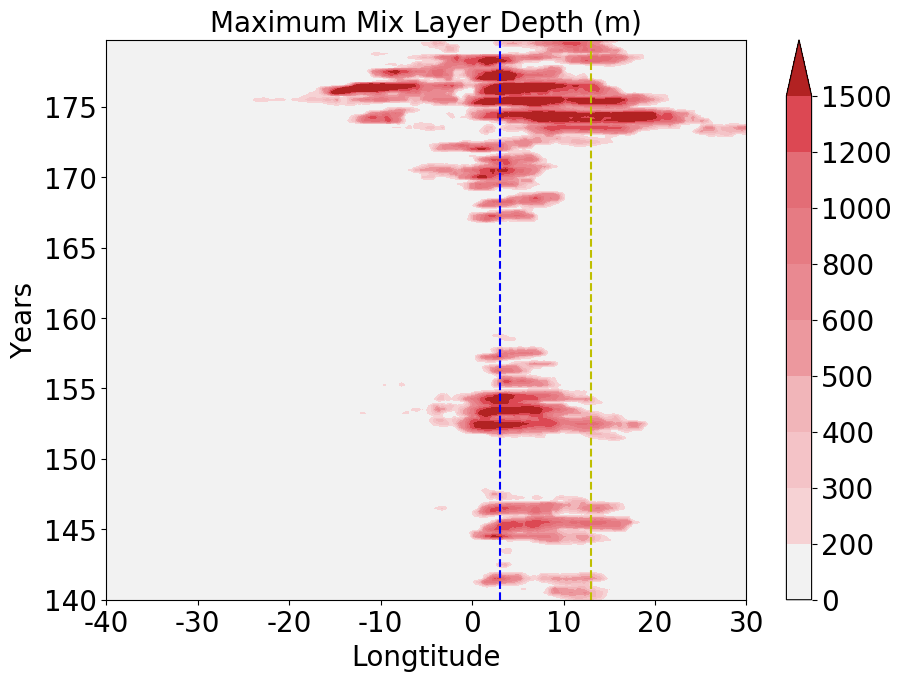

In [9]:
# plot the result
fig = plt.figure(figsize=(10, 7), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.contourf(xx, yy, result/100, cmap = new_cmap,norm =norm,spacing = 'uniform',\
                  levels = nice_levels,extend='max')
im.cmap.set_over('firebrick')
cbar = fig.colorbar(im, ax=ax0,extendfrac='auto',ticks=nice_levels)
cbar.ax.tick_params(labelsize=20)
ax0.set_title('Mixed Layer Depth')
plt.vlines(430, 0, 159, colors = "b",linestyles = "dashed")
plt.vlines(530, 0, 159, colors = "y",linestyles = "dashed")
#############################################################################
##设定X坐标值
plt.xticks(range(0,701,100), ['-40', '-30', '-20', '-10', '0','10','20','30'],**my_font)
plt.yticks(range(0,160,20), ['140', '145', '150', '155', '160','165','170','175','180'],**my_font)
plt.xlabel('Longtitude',**my_font)
plt.ylabel('Years',**my_font)
ax0.set_title('Maximum Mix Layer Depth (m)',**my_font)

plt.savefig("avexmxl.png")